In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

#from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/Naive%20Bayes%20%26%20Glass%20Classification/glass.csv'
df = pd.read_csv(url)

#https://www.kaggle.com/uciml/glass

#Type of glass: (class attribute)
#-- 1 buildingwindowsfloatprocessed 
#-- 2 buildingwindowsnonfloatprocessed 
#-- 3 vehiclewindowsfloatprocessed
#-- 4 vehiclewindowsnonfloatprocessed (none in this database)
#-- 5 containers
#-- 6 tableware
#-- 7 headlamps

# 1 Basic Information (all-features)

## 1.1 (Before) Normalization-MinMaxScaler/Standardize-StandardScaler

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
#df.head(10)

In [ ]:
#df.tail(10)

In [ ]:
df.sample(4)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.0,0.17,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1
154,1.51694,12.86,3.58,1.31,72.61,0.61,8.79,0.0,0.00,3


## 1.2 Plot

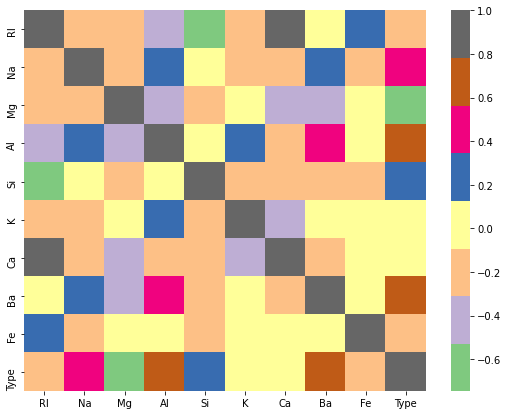

In [ ]:
fig = plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='Accent')

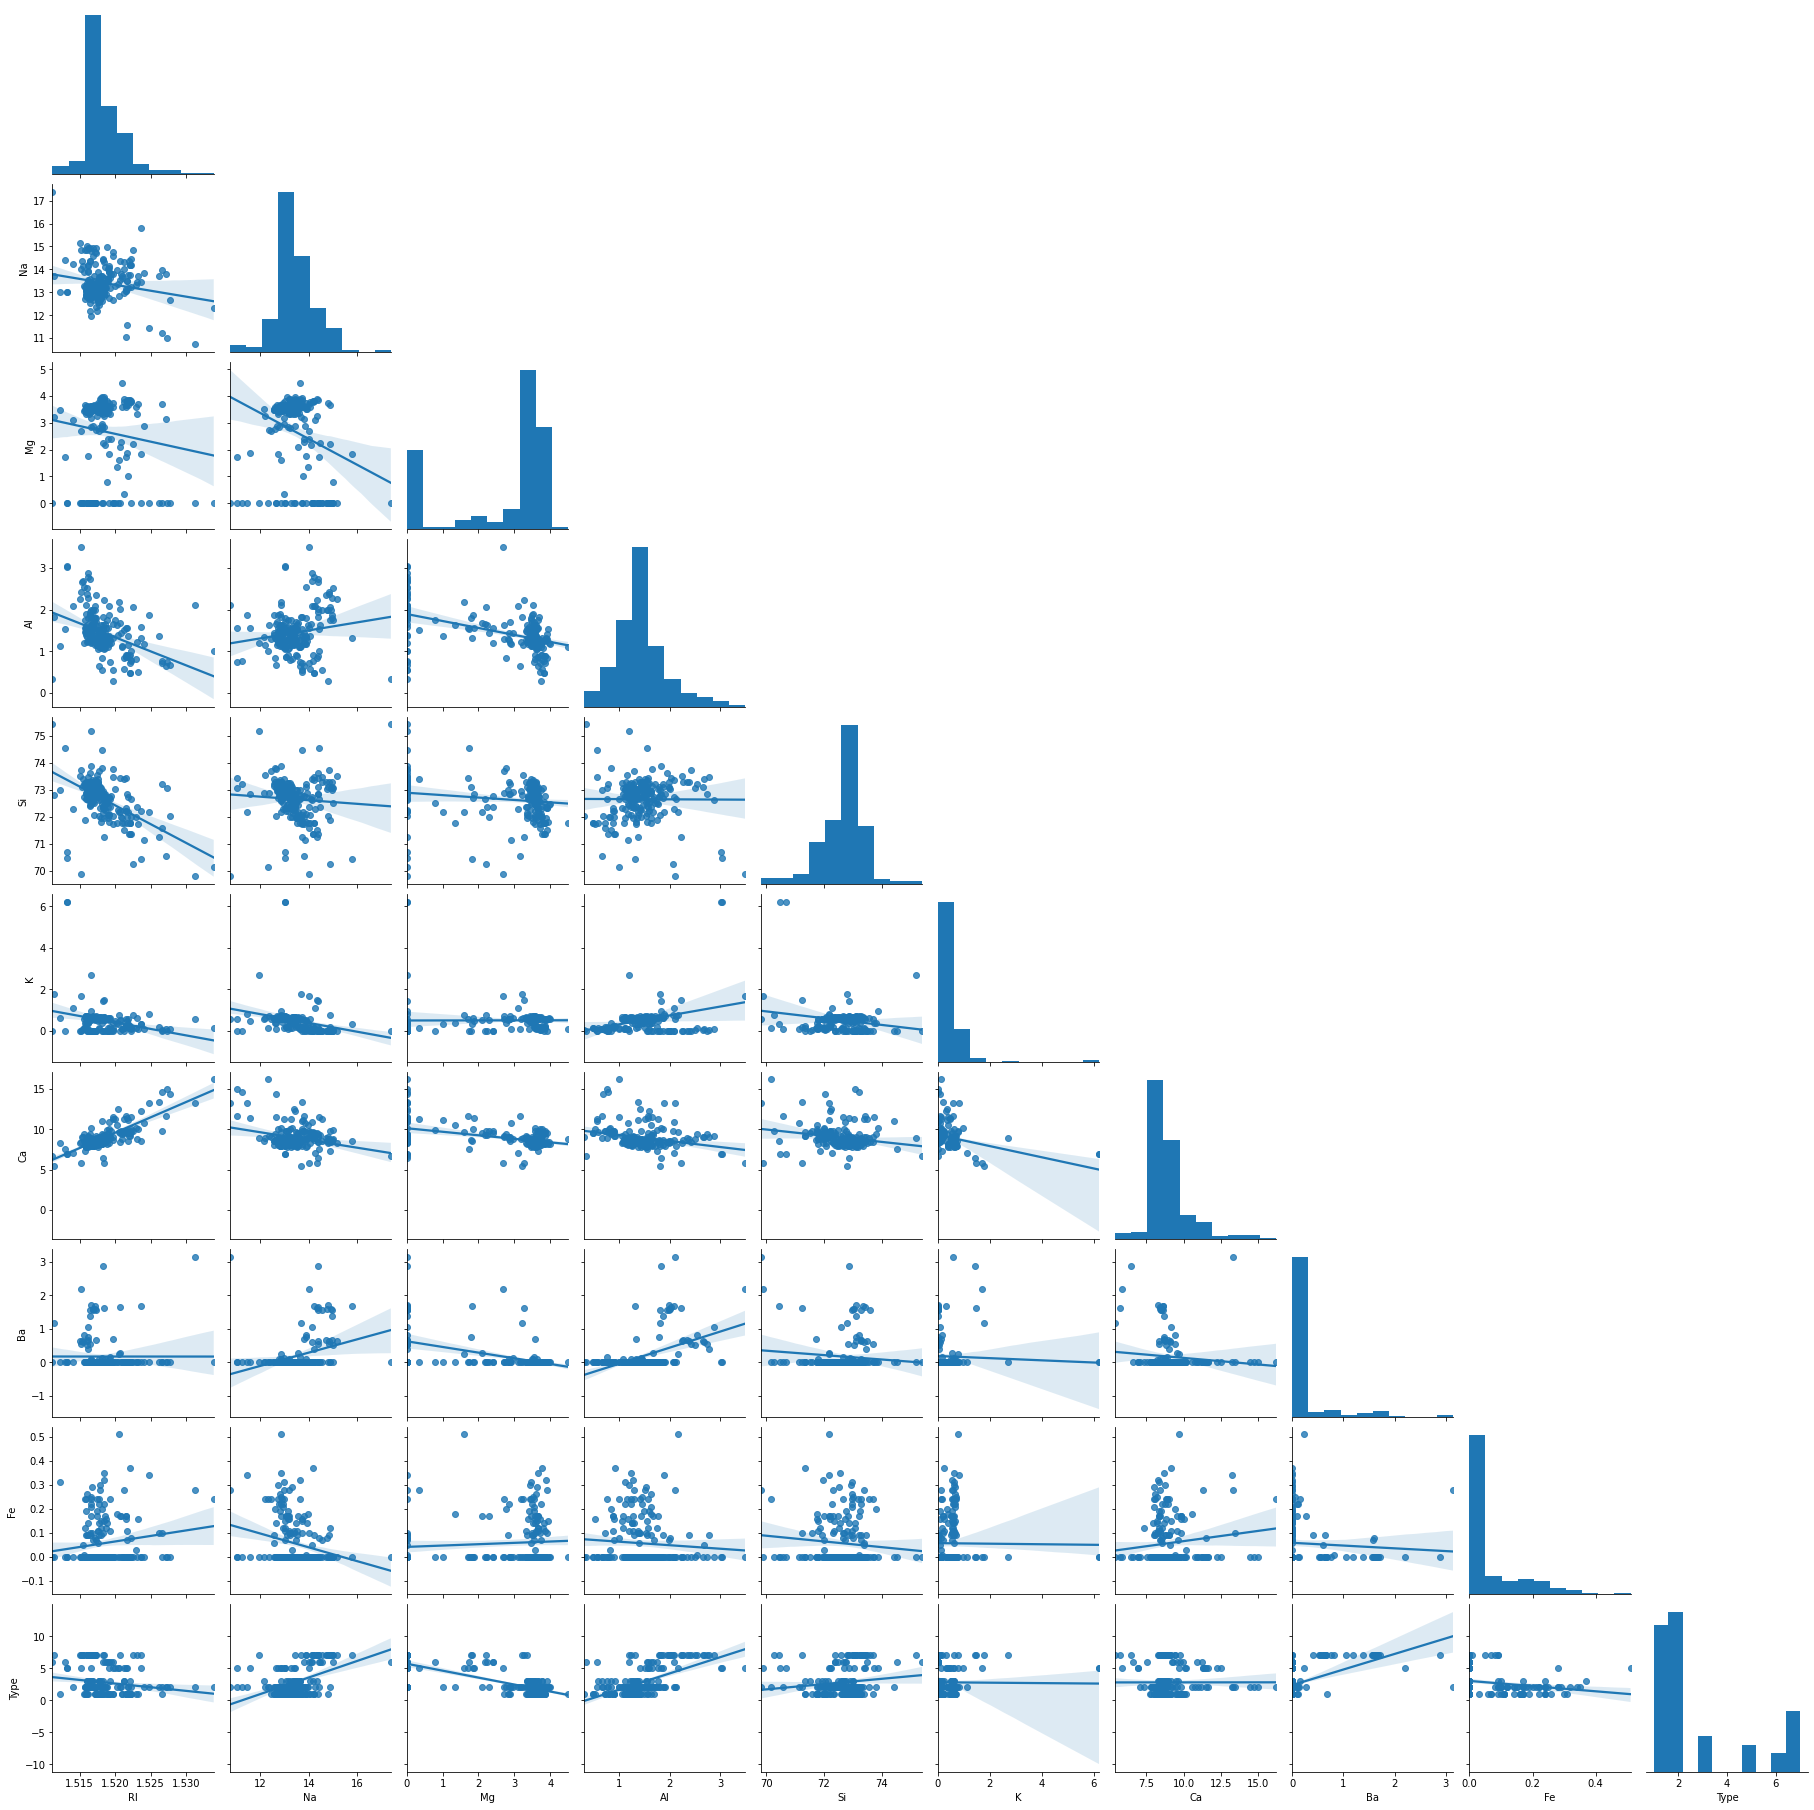

In [ ]:
sns.pairplot(df,kind='reg',corner=True)

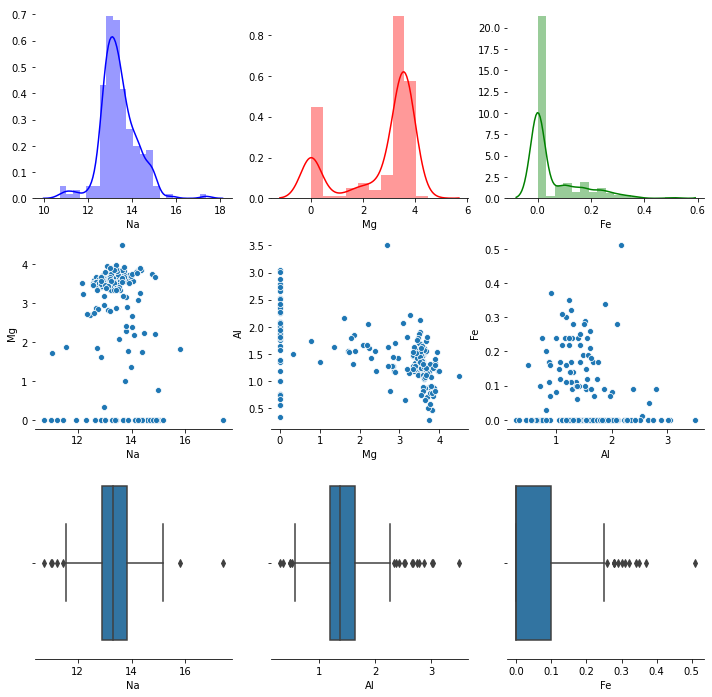

In [ ]:
f, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=False)
sns.despine(left=True)

sns.distplot(df.iloc[:,1], kde=True, color="b", ax=axes[0,0])
sns.distplot(df.iloc[:,2], kde=True, color="r", ax=axes[0,1])
sns.distplot(df.iloc[:,8], kde=True, color="g", ax=axes[0,2])

sns.scatterplot(x=df.iloc[:,1],y=df.iloc[:,2],data=df, ax=axes[1, 0])
sns.scatterplot(x=df.iloc[:,2],y=df.iloc[:,3],data=df, ax=axes[1, 1])
sns.scatterplot(x=df.iloc[:,3],y=df.iloc[:,8],data=df, ax=axes[1, 2])

sns.boxplot(df.iloc[:,1],ax=axes[2, 0])
sns.boxplot(df.iloc[:,3],ax=axes[2, 1])
sns.boxplot(df.iloc[:,8],ax=axes[2, 2])

## 1.3 Data Splitting/cleansing

In [ ]:
#Default Parameter
X_train , X_test,y_train,y_test = train_test_split(df.drop(['Type'],axis=1),df['Type'],train_size = 0.8,random_state=100)

## 1.4 Normalization-MinMaxScaler

In [ ]:
minMaxScaler_X_tr = MinMaxScaler()
minMaxScaler_X_te = MinMaxScaler()

norm_df_X_tr = minMaxScaler_X_tr.fit_transform(X_train)
dfNorm_X_tr = pd.DataFrame(norm_df_X_tr,columns=df.columns[0:9])

norm_df_X_te = minMaxScaler_X_tr.fit_transform(X_test)
dfNorm_X_te = pd.DataFrame(norm_df_X_te,columns=df.columns[0:9])

#df_norm = min_max_scaler.fit_transform(df.drop(df.columns[9],axis=1))
#norm_df = pd.DataFrame(df_norm,columns=df.columns[0:9])
#norm_df.sample(5)

## 1.5 Standardize-StandardScaler

In [ ]:
stdScaler_X_tr = StandardScaler()
stdScaler_X_te = StandardScaler()

std_df_X_tr = stdScaler_X_tr.fit_transform(X_train)
dfStd_X_tr = pd.DataFrame(std_df_X_tr,columns=df.columns[0:9])

std_df_X_te = stdScaler_X_te.fit_transform(X_test)
dfStd_X_te = pd.DataFrame(std_df_X_te,columns=df.columns[0:9])

#df_stad = stand_scaler.fit_transform(df.drop(df.columns[9],axis=1))
#stad_df = pd.DataFrame(df_stad,columns=df.columns[0:9])
#stad_df.sample(5)

# 2 sklearn-Naive Bayes (all-features)

## 2.1 Default Parameter

In [ ]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predict = nb.predict(X_test)

### 2.1.1 Model Evaluation

In [ ]:
confusion_matrix(y_test,y_predict)

array([[10,  0,  0,  0,  0,  0],
       [14,  0,  2,  1,  2,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  5]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.4186046511627907,
 0.4186046511627907,
 0.4186046511627907,
 0.4186046511627907)

## 2.2 Normalization

In [ ]:
nbNor = GaussianNB()
nbNor.fit(dfNorm_X_tr,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predictNorm = nbNor.predict(dfNorm_X_te)

###2.2.1 Model Evaluation

In [ ]:
confusion_matrix(y_test,y_predictNorm)

array([[1, 2, 0, 3, 0, 4],
       [0, 1, 0, 7, 2, 9],
       [0, 1, 0, 2, 0, 0],
       [0, 0, 0, 4, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 5]])

In [ ]:
accuracy_score(y_test,y_predictNorm),f1_score(y_test,y_predictNorm,average = 'micro'),precision_score(y_test,y_predictNorm,average = 'micro'),recall_score(y_test,y_predictNorm,average = 'micro')

(0.27906976744186046,
 0.27906976744186046,
 0.27906976744186046,
 0.27906976744186046)

In [ ]:
#data = [[accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)]]

#table_data = pd.DataFrame(data,columns=['Accuracy','F1 score','Recall','Precision'],index=['all-features/Normalization'])


In [ ]:
#table_data

##2.3 Standardize

In [ ]:
nbStd = GaussianNB()
nbStd.fit(dfStd_X_tr,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predictStd = nbStd.predict(dfStd_X_te)

### 2.3.1 Model Evaluation

In [ ]:
confusion_matrix(y_test,y_predictStd)

array([[ 9,  0,  1,  0,  0,  0],
       [14,  0,  2,  3,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  5]])

In [ ]:
accuracy_score(y_test,y_predictStd),f1_score(y_test,y_predictStd,average = 'micro'),precision_score(y_test,y_predictStd,average = 'micro'),recall_score(y_test,y_predictStd,average = 'micro')

(0.3488372093023256,
 0.3488372093023256,
 0.3488372093023256,
 0.3488372093023256)

In [ ]:
#data = [[accuracy_score(y_test,y_predict),f1_score(y_test,y_predict),precision_score(y_test,y_predict),recall_score(y_test,y_predict)]]
#table_data2 = pd.DataFrame(data,columns=['Accuracy','F1 score','Recall','Precision'],index=['all-features/Standardization'])
#table_data = table_data.append(table_data2)

In [ ]:
#table_data

# 3 case1 - (df[['Na','Mg','Al']])

In [ ]:
df_case1 = df[['Na','Mg','Al']]

X_train , X_test,y_train,y_test = train_test_split(df_case1,df['Type'],train_size = 0.8,random_state=100)

nbCase1 = GaussianNB()
nbCase1.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_predict = nbCase1.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_predict)

array([[ 9,  1,  0,  0,  0,  0],
       [16,  0,  0,  2,  1,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  1],
       [ 0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  4]])

In [ ]:
accuracy_score(y_test,y_predict),f1_score(y_test,y_predict,average = 'micro'),precision_score(y_test,y_predict,average = 'micro'),recall_score(y_test,y_predict,average = 'micro')

(0.37209302325581395,
 0.3720930232558139,
 0.37209302325581395,
 0.37209302325581395)